In [990]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns

In [991]:
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

## non-uniform distribution of data among agents

In [1054]:
regression_weight = [0.5, 0.6, -0.9, 0.01, -0.15, -0.42, 0.5, 0.35, 0.3, -0.25]

In [1055]:
def poly_function(x):
    return -0.25*x**9 + 0.3*x**8 + 0.35*x**7 + 0.5*x**6 - 0.42*x**5 - 0.15*x**4 + 0.01*x**3 - 0.9*x**2 + 0.6*x + 0.5

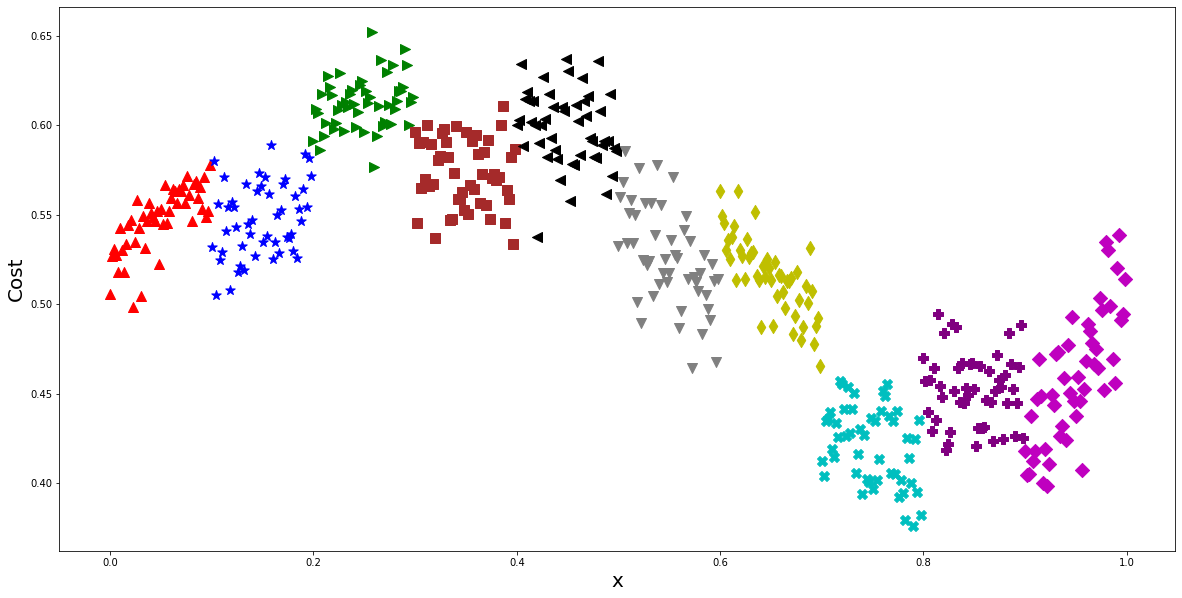

In [1056]:
y_res = []
x = []
data_x = []
data_y = []
X = []
Y = []

marker = ['^','*','>','s','<','v','d','X','P','D']
color =["red","blue","green", "brown",'k',"gray","y","c", "purple",'m']
plt.figure(figsize=(20,10))
for i in np.arange(0,1,0.002):
    y = poly_function(i)
    x.append(i)
    sublist = [1]
    for j in range(1, 10):
        sublist.append(i**j)
    data_x.append(sublist)
    if 0<=i<0.1:
        noise = np.random.normal(0.02,0.012)
    elif 0.1<=i<0.2:
        noise = np.random.normal(-0.02,0.019) 
    elif 0.2<=i<0.3:
        noise = np.random.normal(0.02,0.012) 
    elif 0.3<=i<0.4:
        noise = np.random.normal(-0.025,0.023)
    elif 0.4<=i<0.5:
        noise = np.random.normal(0.02,0.02) 
    elif 0.5<=i<0.6:
        noise = np.random.normal(-0.021,0.02) 
    elif 0.6<=i<0.7:
        noise = np.random.normal(0.022,0.014)
    elif 0.7<=i<0.8:
        noise = np.random.normal(-0.02,0.02)
    elif 0.8<=i<0.9:
        noise = np.random.normal(0.022,0.022) 
    else:
        noise = np.random.normal(-0.02,0.023) 
        
    y_scatter = y + noise
    
    data_y.append(y_scatter)
    y_res.append(y)
    
    
    X.append(i)
    Y.append(poly_function(i) + noise)
    
    plt.scatter(i,y_scatter,c=color[int(10*i)],marker=marker[int(10*i)],s=100)
    
# plt.plot(x,y_res,c='red',linewidth=2)
plt.ylabel('Cost',fontsize=20)
plt.xlabel('x',fontsize=20)
plt.savefig("Original_Given_Data.png",format='png',dpi=150)

In [1057]:
temp = list(zip(X, Y))
random.shuffle(temp)
X_shuffle, Y_shuffle = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
X_shuffle, YX_shuffleuffle = list(X_shuffle), list(Y_shuffle)

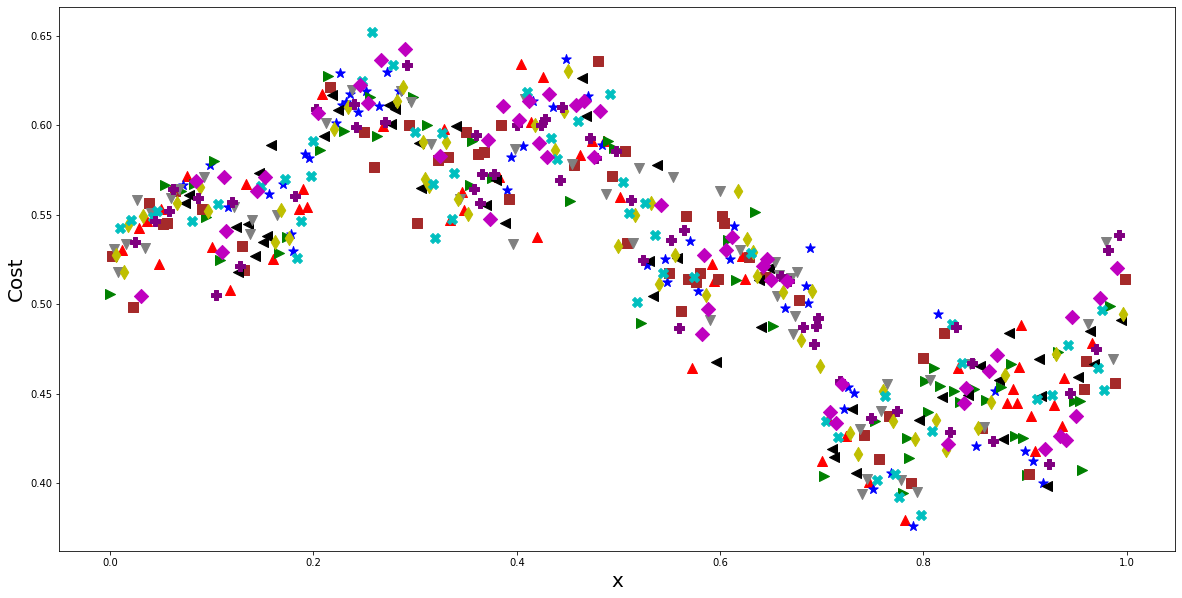

In [1059]:
color =["red","blue","green", "brown",'k',"gray","y","c", "purple",'m']
marker = ['^','*','>','s','<','v','d','X','P','D']

plt.figure(figsize=(20,10))

for device in range(0,10):
    plt.scatter(X_shuffle[device*50 : device*50 + 50],Y_shuffle[device*50 : device*50 + 50],c=color[device]
                ,s=100,marker=marker[device])
    
plt.ylabel('Cost',fontsize=20)
plt.xlabel('x',fontsize=20)
plt.savefig("colored_data_IID.png",format='png',dpi=150)

In [1060]:
data_x = np.array(data_x)
data_y = np.array(data_y)

## GMM Below

In [1061]:
data = pd.DataFrame(X)
data.columns=["X"]
data['Y'] = Y
data.head()

,X,Y
0,0.000,0.505943
1,0.002,0.527148
2,0.004,0.530925
3,0.006,0.527649
4,0.008,0.517966


In [1062]:
gmm = mixture.GaussianMixture(n_components=10, covariance_type="full").fit(data)
labels = gmm.predict(data)

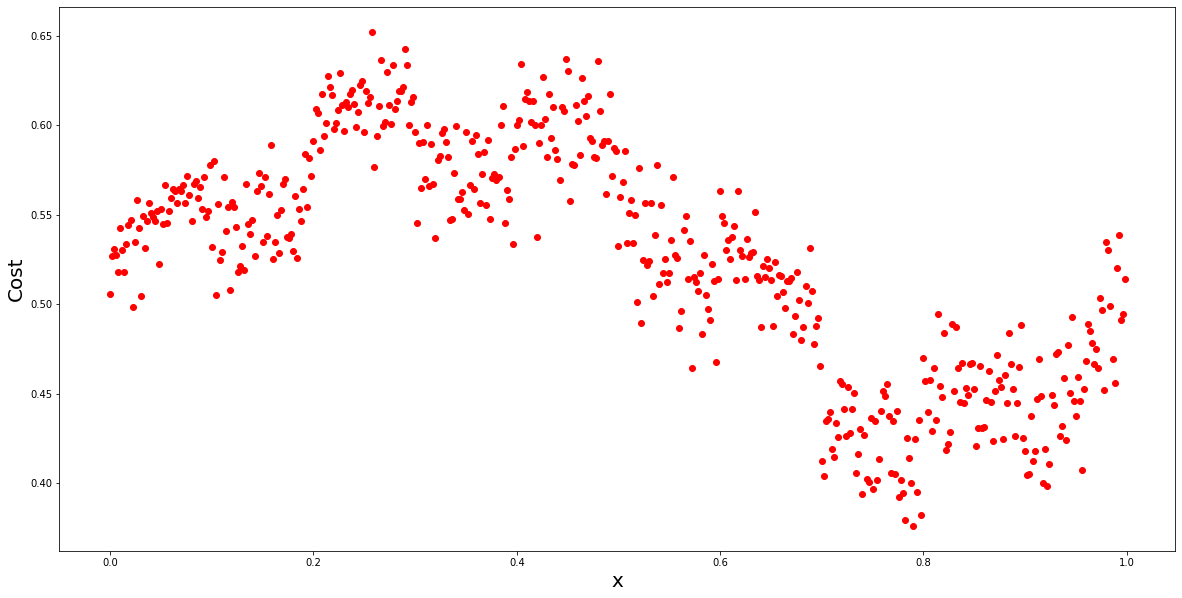

In [1063]:
plt.figure(figsize=(20,10))

plt.scatter(X,Y,c='r')

plt.ylabel('Cost',fontsize=20)
plt.xlabel('x',fontsize=20)
plt.savefig("Uncolored_data.png",format='png',dpi=150)

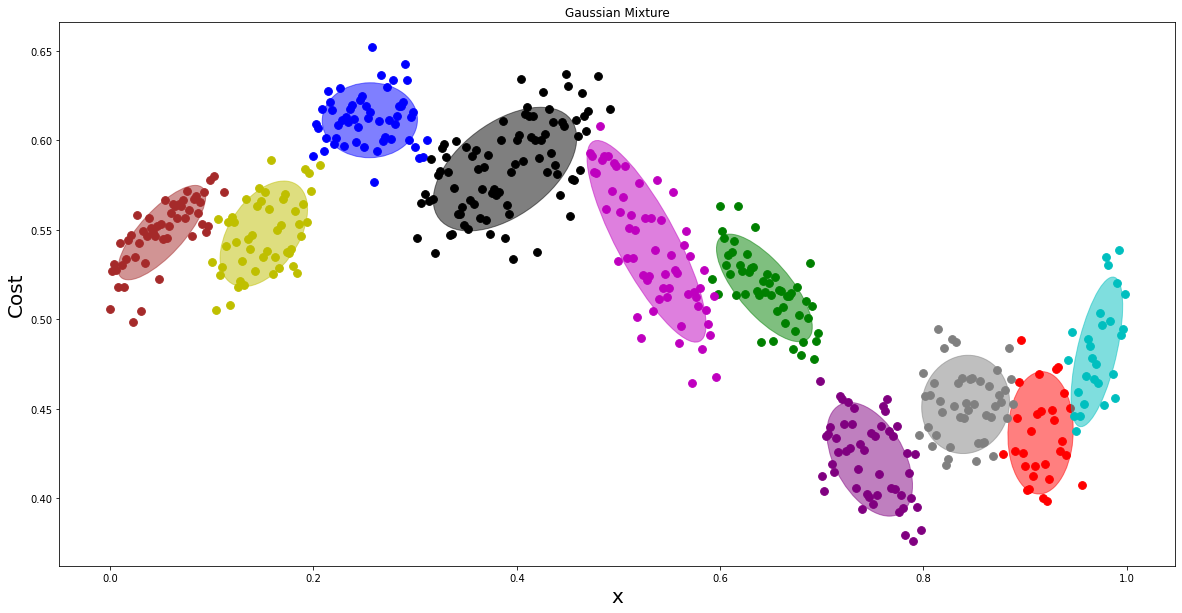

In [1064]:
plt.figure(figsize=(20,10))

data = np.array(data)
plot_results(data, labels, gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")

plt.ylabel('Cost',fontsize=20)
plt.xlabel('x',fontsize=20)
plt.savefig("Data_for_fitting_Gaussian_Mixture_Models_Python.png",format='png',dpi=150)

<AxesSubplot:xlabel='x', ylabel='Cost'>

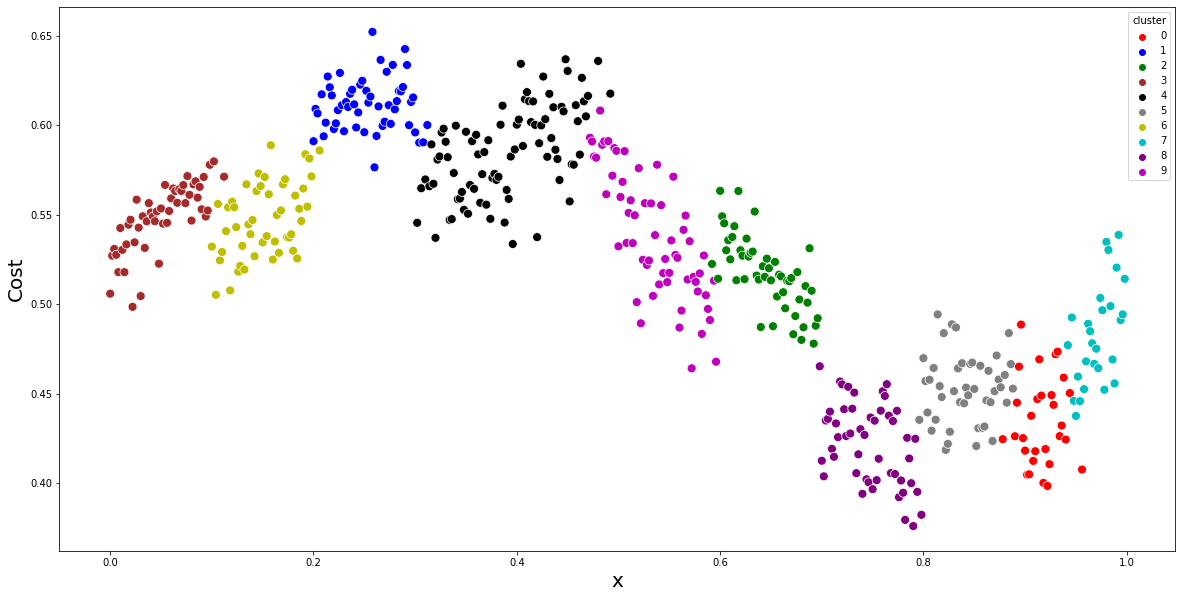

In [1065]:
plt.figure(figsize=(20,10))
data = pd.DataFrame(X)
data.columns=["X"]
data['Y'] = Y
data["cluster"]= labels

plt.ylabel('Cost',fontsize=20)
plt.xlabel('x',fontsize=20)
sns.scatterplot(data=data, x="X",y="Y", 
                hue="cluster",palette=["red","blue","green", "brown",'k',"gray","y","c", "purple",'m'],s=80)

In [816]:
color_iter = ["red","blue","green", "brown",'k',"gray","y","c", "purple",'m']

In [817]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(1, 1, 1)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1],s=60, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        
    plt.title(title)

## End

## Starting our FedAvg

In [209]:
import numpy as np
import random
import matplotlib as mp
import numdifftools as nd
import math
import matplotlib.pyplot as plt
import statistics
from tqdm import tqdm as tq
import time
from numpy.linalg import norm

In [210]:
q_n_t = [random.uniform(0, 1) for i in range(10)]

In [211]:
def cost(weight):
    summation = 0
    for i in range(0,500):
        summation = summation + (data_y[i] - np.dot(data_x[i,:],weight))**2
    return 1/10*summation

In [212]:
from scipy.stats import bernoulli
def get_probability_functions():
    lst = []
    for i in range(0, 10):
        tmp = []
        for j in range(0,20):   
            tmp.append(bernoulli.rvs(size=100,p=q_n_t[i]))
        lst.append(tmp)
    return lst

In [213]:
lst = get_probability_functions()

In [214]:
def complete_gradients(weight):
    gradient = [0 for i in range(0,10)]
    for i in range(0,500):
        gradient = gradient - (2*(np.dot((data_y[i] -  np.dot(data_x[i,:], weight)),data_x[i,:])))
    return 1/10*gradient

In [215]:
def agent_complete_gradient(weight,device):
    gradient = [0 for i in range(0,10)]
    index = 50*device
    for i in range(0,50):
        gradient = gradient - (2*(np.dot((data_y[i+index] -  np.dot(data_x[i+index,:], weight)),data_x[i+index,:])))
    return 1/50*gradient

In [216]:
def agent_gradient(weight,device,random):
    index = 50*(device) + random
    gradient = -2*(data_y[index] -  np.dot(data_x[index], weight)) * data_x[index]
    return gradient

## Original FedAvg

100%|█████████████████████████████████████████████| 5/5 [00:40<00:00,  8.11s/it]


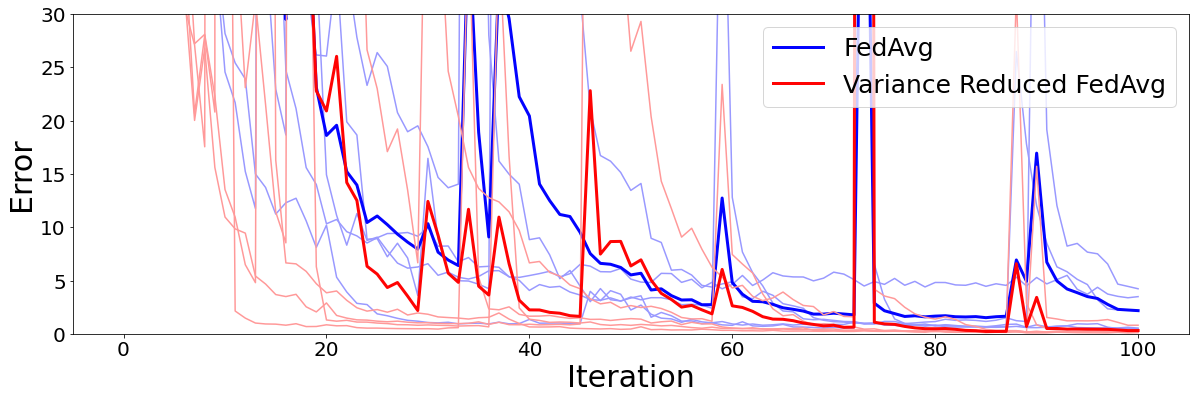

In [999]:
# Below is the original FedAvg

import random
x_x = []
y_y = []

res1 = []
res1_gradient = []
res1_d1 = []

weight = [0.1 for i in range(0,10)]

res1_variance_cost = [[cost(weight)] for i in range(0,20)]
res1_gradient = []

fig = plt.figure(figsize=(20,20))

CEP_weight_FedAvg = []
CEP_cost_FedAvg = []

for j in tq(range(0,5)):
    
    weight = [0.1 for i in range(0,10)]
    y = [1 for i in range(0,10)]
    tmp = [0 for i in range(0,10)]
    result_weight = []
    result_cost = [(norm(cost(weight)) - cost(regression_weight))/cost(regression_weight)]
    result_cost_var = [cost(weight)]
    result_gradient = [norm(complete_gradients(weight))]
    
    for iteration in range(0,100):
        for device in range(0,10):
            y[device] = weight
            tmp[device] = y[device]
            for i in range(0,10):
                import random
                random = random.randrange(0, 50)
                y[device] = y[device] - 1/math.sqrt(iteration+100) * agent_gradient(y[device],device,random)
                
        g_update = 0
        for device in range(0, 10):
            g_update += (lst[device][j][iteration]/q_n_t[device])*(y[device] - tmp[device])

        weight = weight + 1/10*g_update

        

        result_cost.append(cost(weight))

        result_cost_var.append(cost(weight))
        res1_variance_cost[j].append(cost(weight)) 

        if iteration == 99:
            CEP_weight_FedAvg.append(norm(weight))
            CEP_cost_FedAvg.append(cost(weight))
        
    res1_gradient.append(result_gradient)
    res1.append(abs((result_cost - cost(regression_weight))/cost(regression_weight)))
    res1_d1.append(result_cost_var)
    
    plt.subplot(3,1,1)
    plt.plot(abs(result_cost - cost(regression_weight))/cost(regression_weight), c=lighten_color('b',0.4))
    plt.ylim(0,30)
#     plt.ylim(0,1)
    
d1 = np.mean(res1, axis=0)
d1_var = np.mean(res1_d1, axis=0)
plt.subplot(3,1,1)
plt.plot(d1,c=lighten_color('b',0.99),label="FedAvg",linewidth=3)
plt.legend(loc='upper right',fontsize=20)

# ----------------

# variance = []

# for iteration in range(0,100):
#     summ = 0
#     diff=0
#     for j in range(0,20):
#         diff += (res1_variance_cost[j][iteration] - d1_var[iteration])**2
#     summ = diff/20
#     variance.append(summ)
# plt.subplot(3,1,2)
# plt.plot(variance,'b',label="Algorithm of "+"["+"15"+"]",linewidth=3)
# plt.legend(loc='upper right',fontsize=20)

# # ----------------

# res = [[]for i in range(0,20)]
# plt.subplot(3,1,2)
# for j in range(0,20):
#     summ = 0
#     for iteration in range(0,100):
#         diff = 0
#         diff = (res1_variance_cost[j][iteration] - d1_var[iteration])**2
#         res[j].append(diff)

#     plt.plot(res[j],c=lighten_color('b',0.4))
    
    
    
# Below is FedAvg+SVRG------------------------------------


import random
x_x = []
y_y = []

res2 = []
res2_d2 = []

weight = [0.1 for i in range(0,10)]

res2_variance_cost = [[cost(weight)] for i in range(0,20)]
res2_gradient = []

CEP_weight_SVRG = []
CEP_cost_SVRG = []

for j in tq(range(0,5)):
    
    weight = [0.1 for i in range(0,10)]
    y = [1 for i in range(0,10)]
    y_bar = [1 for i in range(0,10)]
    tmp = [0 for i in range(0,10)]
    result_weight = []
    result_cost = [(norm(cost(weight)) - cost(regression_weight))/cost(regression_weight)]
    result_cost_var = [cost(weight)]
    result_gradient = [complete_gradients(weight)]
    
    for iteration in range(0,100):
        for device in range(0,10):
            y_bar[device] = weight
            tmp[device] = y_bar[device] 
            
            for s in range(0,10):
                m = agent_complete_gradient(y_bar[device],device)
                y[device] = y_bar[device]
                
                for k in range(0,10):
                    import random
                    random = random.randrange(0, 50)
                    g = m - agent_gradient(y_bar[device],device,random) + agent_gradient(y[device],device,random)
                    y[device] = y[device] - 1/math.sqrt(100)*g

                y_bar[device] = y[device]
        g_update = 0
        for device in range(0, 10):
            g_update += (lst[device][j][iteration]/q_n_t[device])*(y[device] - tmp[device])

        weight = weight + 1/10*g_update


        result_cost.append(cost(weight))

        result_cost_var.append(cost(weight))
        res2_variance_cost[j].append(cost(weight)) 
        
        if iteration == 99:
            CEP_weight_SVRG.append(norm(weight))
            CEP_cost_SVRG.append(cost(weight))

           
    res2_gradient.append(result_gradient)
    res2.append(abs((result_cost - cost(regression_weight)) / cost(regression_weight)))
    res2_d2.append(result_cost_var)
    
    plt.xlabel('Iteration',fontsize=30)
    plt.ylabel('Error',fontsize=30)
    plt.subplot(3,1,1)
    
    plt.plot(abs(result_cost - cost(regression_weight))/cost(regression_weight), c=lighten_color('r',0.4))
    
d2 = np.mean(res2, axis=0)
d2_var = np.mean(res2_d2, axis=0)

plt.subplot(3,1,1)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(d2,c=lighten_color('r',0.99),label="Variance Reduced FedAvg",linewidth=3)
plt.legend(loc='upper right',fontsize=25)
# plt.ylim(0,0.02)


# ----------------
# variance = []
# for iteration in range(0,100):
#     summ = 0
#     diff=0
#     for j in range(0,20):
#         diff += (res2_variance_cost[j][iteration] - d2_var[iteration])**2
#     summ = diff/20
#     variance.append(summ)
# plt.subplot(3,1,2)
# # plt.ylim(0,0.3)
# plt.ylabel('Variance',fontsize=30)
# plt.plot(variance,'r',label="Proposed Algorithm",linewidth=4)
# plt.legend(loc='upper right',fontsize=25)

# # -----------------

# res = [[]for i in range(0,20)]
# plt.subplot(3,1,2)
# plt.xlabel('Iteration',fontsize=30)
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# for j in range(0,20):
#     summ = 0
#     for iteration in range(0,100):
#         diff = 0
#         diff = (res2_variance_cost[j][iteration] - d2_var[iteration])**2
#         res[j].append(diff)

#     plt.plot(res[j],c=lighten_color('r',0.4))



fig.savefig('Cost_Variance_Simulation.jpg')

## CEP plot For FedAvg+SVRG

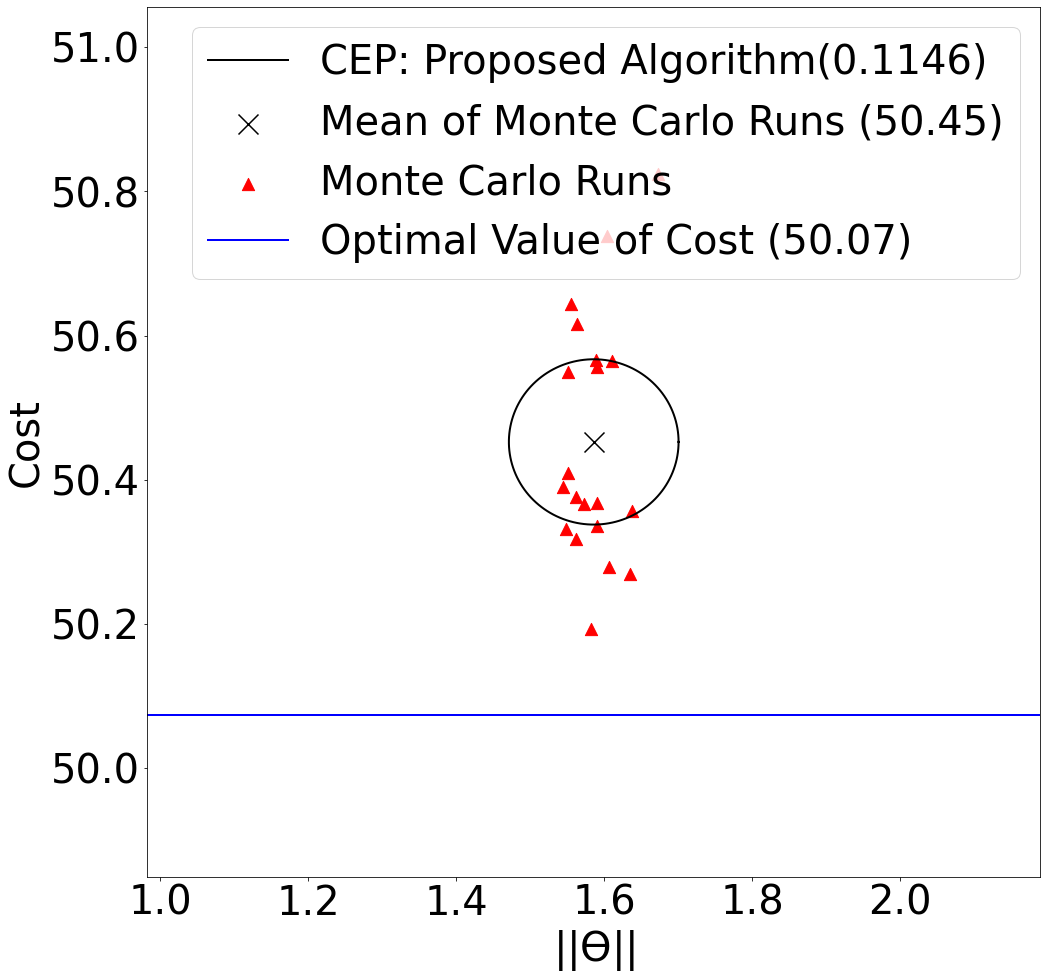

In [962]:
sum_CEP_cost = 0           
for el in CEP_cost_SVRG:
    sum_CEP_cost += el
sum_CEP_cost = sum_CEP_cost/20

sum_CEP_weight = 0           
for el in CEP_weight_SVRG:
    sum_CEP_weight += el
sum_CEP_weight = sum_CEP_weight/20

angle = np.linspace( 0 , 2 * np.pi , 150 ) 
radius = getting_CEP_radius(CEP_weight_SVRG,CEP_cost_SVRG,sum_CEP_weight,sum_CEP_cost)
 
x = radius * np.cos( angle ) + sum_CEP_weight
y = radius * np.sin( angle ) + sum_CEP_cost


CEP_fig = plt.figure(figsize=(16,16))

plt.plot(x,y,c='black',label="CEP: Proposed Algorithm("+format(radius, ".4f")+")",linewidth=2)
plt.scatter(sum_CEP_weight,sum_CEP_cost,marker='x',s=400,c='black',label="Mean of Monte Carlo Runs "+ "("+format(sum_CEP_cost, ".2f")+")")
plt.scatter(CEP_weight_SVRG,CEP_cost_SVRG,marker='^',c='r',label="Monte Carlo Runs",s=150)
plt.axhline(cost(regression_weight),linewidth = 2,color = 'blue',label="Optimal Value of Cost " + "("+format(cost(regression_weight), ".2f")+")")
plt.legend(loc='upper right',fontsize=40)
# plt.axis('square')
plt.ylim(sum_CEP_cost - 1/5*radius_FedAvg,sum_CEP_cost + 1/5*radius_FedAvg)
plt.xlim(sum_CEP_weight -1/5*radius_FedAvg,sum_CEP_weight + 1/5*radius_FedAvg)
plt.xlabel('$||\u03F4||$',fontsize=40)
plt.ylabel('Cost',fontsize=40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)


CEP_fig.savefig('CEP_FedAvg+SVRG.jpg')

 ## CEP plot For FedAvg

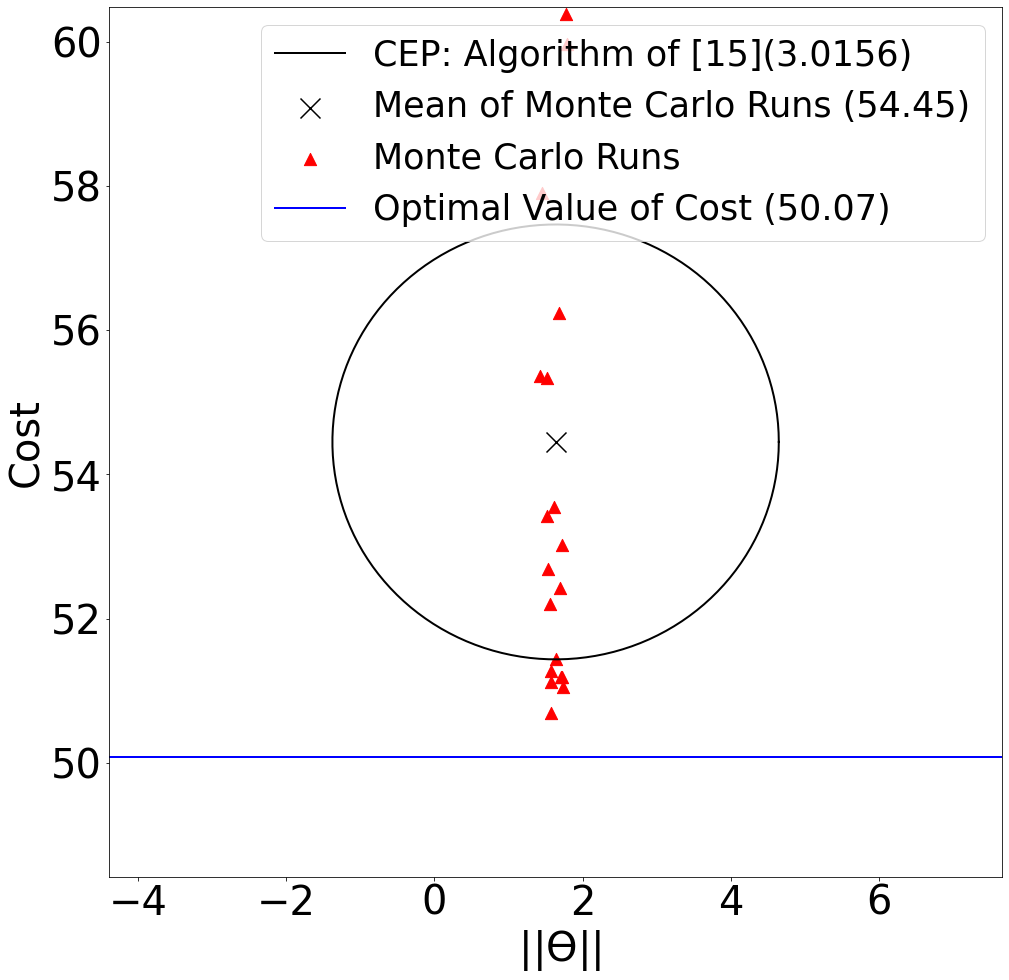

In [961]:
sum_CEP_cost = 0           
for el in CEP_cost_FedAvg:
    sum_CEP_cost += el
sum_CEP_cost = sum_CEP_cost/20

sum_CEP_weight = 0           
for el in CEP_weight_FedAvg:
    sum_CEP_weight += el
sum_CEP_weight = sum_CEP_weight/20

angle = np.linspace( 0 , 2 * np.pi , 150 ) 
radius_FedAvg = getting_CEP_radius(CEP_weight_FedAvg,CEP_cost_FedAvg,sum_CEP_weight,sum_CEP_cost)
 
x = radius_FedAvg * np.cos( angle ) + sum_CEP_weight
y = radius_FedAvg * np.sin( angle ) + sum_CEP_cost


CEP_fig = plt.figure(figsize=(16,16))

plt.plot(x,y,c='black',label="CEP: Algorithm of "+"["+"15"+"]"+ "("+format(radius_FedAvg, ".4f")+")",linewidth=2)
plt.scatter(sum_CEP_weight,sum_CEP_cost,marker='x',s=400,c='black',label="Mean of Monte Carlo Runs "+ "("+format(sum_CEP_cost, ".2f")+")")
plt.scatter(CEP_weight_FedAvg,CEP_cost_FedAvg,marker='^',s=150,c='r',label="Monte Carlo Runs")
plt.axhline(cost(regression_weight),linewidth = 2,color = 'blue',label="Optimal Value of Cost " + "("+format(cost(regression_weight), ".2f")+")")
plt.legend(loc='upper right',fontsize=35)
# plt.axis('square')
plt.ylim(sum_CEP_cost - 2*radius_FedAvg,sum_CEP_cost + 2*radius_FedAvg)
plt.xlim(sum_CEP_weight -2*radius_FedAvg,sum_CEP_weight + 2*radius_FedAvg)
plt.xlabel(' $||\u03F4||$ ',fontsize=40)
plt.ylabel('Cost',fontsize=40)
plt.xticks(fontsize = 40)
plt.yticks(fontsize = 40)

CEP_fig.savefig('CEP_FedAvg.jpg')

In [254]:
import math
def getting_CEP_radius(CEP_weight,CEP_cost,CEP_sum_weight,CEP_sum_cost):
    result = []
    for i in range(0,20):
        distance = math.sqrt((CEP_weight[i] - CEP_sum_weight)**2 + (CEP_cost[i] - CEP_sum_cost)**2)
        result.append(distance)
    result = sorted(result)
    return result[9]   

In [255]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.
    
    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = np.array(colorsys.rgb_to_hls(*mc.to_rgb(c)))
    return colorsys.hls_to_rgb(c[0],1-amount * (1-c[1]),c[2])

## Plotting all the models (FedAvg+SVRG / FedAvg uniform/ FedAvg non-uniform)

100%|███████████████████████████████████████████| 20/20 [01:00<00:00,  3.04s/it]


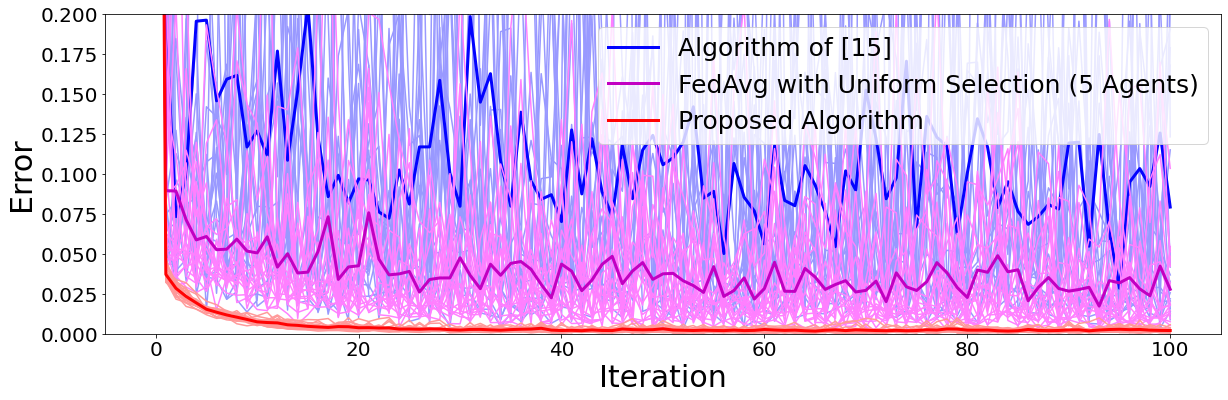

In [956]:
import random
x_x = []
y_y = []

res1 = []
res1_gradient = []
res1_d1 = []

weight = [0.5 for i in range(0,10)]

res1_variance_cost = [[cost(weight)] for i in range(0,20)]
res1_gradient = []

fig2 = plt.figure(figsize=(20,20))

CEP_weight_FedAvg = []
CEP_cost_FedAvg = []

for j in tq(range(0,20)):
    
    weight = [0.5 for i in range(0,10)]
    y = [1 for i in range(0,10)]
    tmp = [0 for i in range(0,10)]
    result_weight = []
    result_cost = [(norm(cost(weight)) - cost(regression_weight))/cost(regression_weight)]
    result_cost_var = [cost(weight)]
    result_gradient = [norm(complete_gradients(weight))]
    
    for iteration in range(0,100):
        for device in range(0,10):
            y[device] = weight
            tmp[device] = y[device]
            for i in range(0,10):
                import random
                random = random.randrange(0, 50)
                y[device] = y[device] - 1/math.sqrt(iteration+100) * agent_gradient(y[device],device,random)
                
        g_update = 0
        for device in range(0, 10):
            g_update += (lst[device][j][iteration]/q_n_t[device])*(y[device] - tmp[device])

        weight = weight + 1/10*g_update

        

        result_cost.append(cost(weight))

        result_cost_var.append(cost(weight))
        res1_variance_cost[j].append(cost(weight)) 

        if iteration == 99:
            CEP_weight_FedAvg.append(norm(weight))
            CEP_cost_FedAvg.append(cost(weight))
        
    res1_gradient.append(result_gradient)
    res1.append(abs((result_cost - cost(regression_weight))/cost(regression_weight)))
    res1_d1.append(result_cost_var)
    
    plt.subplot(3,1,1)
    plt.plot(abs(result_cost - cost(regression_weight))/cost(regression_weight), c=lighten_color('b',0.4))
    plt.ylim(0,0.2)
    
d1 = np.mean(res1, axis=0)
d1_var = np.mean(res1_d1, axis=0)
plt.subplot(3,1,1)
plt.plot(d1,c=lighten_color('b',0.99),label="Algorithm of "+"["+"15"+"]",linewidth=3)
plt.legend(loc='upper right',fontsize=20)



# -------------------Below is FedAvg with uniform agent sampling 5 agents




import random
x_x = []
y_y = []

res1 = []
# res1_gradient = []
# res1_d1 = []

weight = [0.5 for i in range(0,10)]

# res1_variance_cost = [[cost(weight)] for i in range(0,20)]
# res1_gradient = []

# fig = plt.figure(figsize=(20,20))

# CEP_weight_FedAvg = []
# CEP_cost_FedAvg = []

for j in tq(range(0,20)):
    
    weight = [0.5 for i in range(0,10)]
    y = [1 for i in range(0,10)]
    tmp = [0 for i in range(0,10)]
#     result_weight = []
    result_cost = [(norm(cost(weight)) - cost(regression_weight))/cost(regression_weight)]
#     result_cost_var = [cost(weight)]
#     result_gradient = [norm(complete_gradients(weight))]
    
    for iteration in range(0,100):
        for device in range(0,10):
            y[device] = weight
            tmp[device] = y[device]
            for i in range(0,10):
                import random
                random = random.randrange(0, 50)
                y[device] = y[device] - 1/math.sqrt(iteration+100) * agent_gradient_FedAvg(y[device],device,random)
                
        g_update = 0
        
        import random
        lst_random_agents = random.sample(range(10), 5)
        
        for device in lst_random_agents:
            g_update += 1/10*(y[device] - tmp[device])

        weight = weight + g_update

        

        result_cost.append(cost(weight))

        result_cost_var.append(cost(weight))
        res1_variance_cost[j].append(cost(weight)) 

        if iteration == 99:
            CEP_weight_FedAvg.append(norm(weight))
            CEP_cost_FedAvg.append(cost(weight))
        
    res1_gradient.append(result_gradient)
    res1.append(abs((result_cost - cost(regression_weight))/cost(regression_weight)))
    res1_d1.append(result_cost_var)
    
    plt.subplot(3,1,1)
    plt.plot(abs(result_cost - cost(regression_weight))/cost(regression_weight), c=lighten_color('m',0.4))
#     plt.ylim(0,0.2)
    
d1 = np.mean(res1, axis=0)
# d1_var = np.mean(res1_d1, axis=0)
plt.subplot(3,1,1)
plt.plot(d1,c=lighten_color('m',0.99),label="FedAvg with Uniform Selection (5 Agents)",linewidth=3)
plt.legend(loc='upper right',fontsize=20)



# -------------FedAvg+SVRG is below

import random
x_x = []
y_y = []

res2 = []
res2_d2 = []

weight = [0.5 for i in range(0,10)]

res2_variance_cost = [[cost(weight)] for i in range(0,20)]
res2_gradient = []

CEP_weight_SVRG = []
CEP_cost_SVRG = []

for j in tq(range(0,20)):
    
    weight = [0.5 for i in range(0,10)]
    y = [1 for i in range(0,10)]
    y_bar = [1 for i in range(0,10)]
    tmp = [0 for i in range(0,10)]
    result_weight = []
    result_cost = [(norm(cost(weight)) - cost(regression_weight))/cost(regression_weight)]
    result_cost_var = [cost(weight)]
    result_gradient = [complete_gradients(weight)]
    
    for iteration in range(0,100):
        for device in range(0,10):
            y_bar[device] = weight
            tmp[device] = y_bar[device] 
            
            for s in range(0,5):
                m = agent_complete_gradient(y_bar[device],device)
                y[device] = y_bar[device]
                
                for k in range(0,2):
                    import random
                    random = random.randrange(0, 50)
                    g = m - agent_gradient(y_bar[device],device,random) + agent_gradient(y[device],device,random)
                    y[device] = y[device] - 1/math.sqrt(100)*g

                y_bar[device] = y[device]
        g_update = 0
        for device in range(0, 10):
            g_update += (lst[device][j][iteration]/q_n_t[device])*(y[device] - tmp[device])

        weight = weight + 1/10*g_update


        result_cost.append(cost(weight))

        result_cost_var.append(cost(weight))
        res2_variance_cost[j].append(cost(weight)) 
        
        if iteration == 99:
            CEP_weight_SVRG.append(norm(weight))
            CEP_cost_SVRG.append(cost(weight))

           
    res2_gradient.append(result_gradient)
    res2.append(abs((result_cost - cost(regression_weight)) / cost(regression_weight)))
    res2_d2.append(result_cost_var)
    
    plt.xlabel('Iteration',fontsize=30)
    plt.ylabel('Error',fontsize=30)
    plt.subplot(3,1,1)
    
    plt.plot(abs(result_cost - cost(regression_weight))/cost(regression_weight), c=lighten_color('r',0.4))
    
d2 = np.mean(res2, axis=0)
d2_var = np.mean(res2_d2, axis=0)

plt.subplot(3,1,1)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(d2,c=lighten_color('r',0.99),label="Proposed Algorithm",linewidth=3)
plt.legend(loc='upper right',fontsize=25)


fig2.savefig('Cost_Simulation_all_3_models.jpg')

In [879]:
def agent_gradient_FedAvg(weight,device,random):
    index = 50*(device) + random
    gradient = -2*(data_y[index] -  np.dot(data_x[index], weight)) * data_x[index]
    return gradient

In [256]:
def poly_function(x):
    return -.25*x**9 + 0.3*x**8 + 0.35*x**7 + 0.5*x**6 - 0.42*x**5 - 0.15*x**4 + 0.01*x**3 - 0.9*x**2 + 0.6*x + 0.5

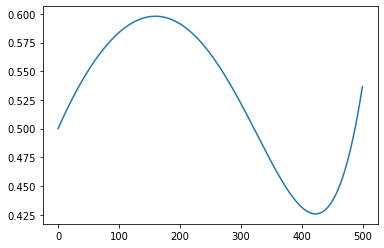

In [257]:
ys = []
for i in np.arange(0,1,0.002):
    y = poly_function(i)
    ys.append(y)
plt.plot(ys)

In [291]:
a = [[2,3,4],[2333,5,1,1,1,1]]


In [293]:
a = np.array(a)

/var/folders/lk/gt5yw8kj7972dwr3bk1kb1lc0000gn/T/ipykernel_21708/742740195.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(a)


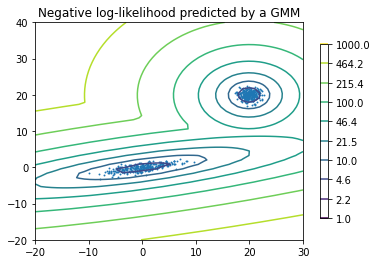

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [1034]:
a = [[1,23,2],[4,23,2]]
random.shuffle(a)

In [1035]:
a

[[4, 23, 2], [1, 23, 2]]

In [1037]:
from random import shuffle 

foo = []
foo.append([1, 2, 3])
foo.append([4, 5, 6])
foo.append([7, 8, 9])

shuffle(foo)
map(shuffle, foo)

print(foo)

[[7, 8, 9], [1, 2, 3], [4, 5, 6]]


In [1038]:

# Python3 code to demonstrate working of
# Shuffle two lists with same order
# Using zip() + * operator + shuffle()
import random
 
# initializing lists
test_list1 = [6, 4, 8, 9, 10]
test_list2 = [1, 2, 3, 4, 5]
 
# printing lists
print(f"The original list 1 : {test_list1}")
print(f"The original list 2 : {test_list2}")
 
# Shuffle two lists with same order
# Using zip() + * operator + shuffle()
temp = list(zip(test_list1, test_list2))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
res1, res2 = list(res1), list(res2)
 
# Printing result
print(f"List 1 after shuffle :  {res1}")
print(f"List 2 after shuffle :  {res2}")

The original list 1 : [6, 4, 8, 9, 10]
The original list 2 : [1, 2, 3, 4, 5]
List 1 after shuffle :  [8, 4, 6, 9, 10]
List 2 after shuffle :  [3, 2, 1, 4, 5]
